# UN Analysis

Analysis of UN actors in agreement-actor networks.


In [1]:
__author__      = 'Roy Gardner'

%run ./network_functions.py


## Load the agreement-actor data

- Load data into a binary-valued relation matrix (BVRM) with agreements in rows and actors in columns
- Matrix values are zero except where a relation between an agreement and an actor exists where the value is one
- Apart from the matrix other data are extracted or computed
- All data are stored in data_dict


In [2]:

data_path = './data/'
nodes_file = 'node_table.csv'
links_file = 'links_table.csv'
agreements_dict = 'agreements_dict.json'

data_dict = load_agreement_actor_data(nodes_file,links_file,agreements_dict,data_path)
print(data_dict.keys())


dict_keys(['agreements_dict', 'dates_dict', 'nodes_data', 'nodes_header', 'links_data', 'links_header', 'agreement_vertices', 'actor_vertices', 'vertices_dict', 'color_map', 'matrix'])


## Collect UN actor indices and IDs

In [3]:

un_actors_list = []

for actor_index,actor_id in enumerate(data_dict['actor_vertices']):
    if len(actor_id) == 0:
        continue
    actor_data = data_dict['vertices_dict'][actor_id]
    actor_name = actor_data[data_dict['nodes_header'].index('node_name')]
    if 'United Nations' in actor_name or 'UN ' in actor_name or ' UN' in actor_name:
        un_actors_list.append((actor_index,actor_id,actor_name))

un_actors_list = sorted(un_actors_list,key=lambda t:t[2])
print(un_actors_list)


[(562, 'COA_51', 'Group of Friends UNSG'), (933, 'IGO_640', 'Office of the United Nations High Commissioner for Human Rights'), (1066, 'IGO_315', 'UN General Assembly'), (871, 'IGO_672', 'UN Office on Drugs and Crimes'), (259, 'IGO_386', 'UN Secretary General'), (440, 'IGO_8', 'UN Security Council'), (1090, 'IGO_49', 'United Nations (General)'), (693, 'IGO_459', "United Nations Children's Fund"), (729, 'IGO_64', 'United Nations Development Programme'), (557, 'IGO_678', 'United Nations Educational, Scientific and Cultural Organization'), (750, 'IGO_440', 'United Nations Human Rights Council'), (960, 'IGO_674', 'United Nations Population Fund'), (448, 'IGO_391', 'United Nations Secretariat')]


## Get UN actor biadjacency matrices

There are two matrices:

1. UN-only matrix: 
    - Rows are agreements that have at least one UN signatory
    - Columns are UN actors
2. UN actors and non-UN co-signatories matrix:
    - Rows are agreements that have at least one UN signatory (as above)
    - Columns are all the actors who are signatories to the row agreements

The indices of the agreements and actors that constitute the above matrices are:

- agreement_indices: Indices into `data_dict['agreement_vertices']` and therefore rows of `data_dict['matrix']`
- un_indices: Indices into `data_dict['actor_vertices']` and therefore columns of `data_dict['matrix']` for UN actors only
- actor_indices: Indices into `data_dict['actor_vertices']` and therefore columns of `data_dict['matrix']` for UN actors and co-signatories


In [4]:
un_indices = [t[0] for t in un_actors_list]

matrix = data_dict['matrix']

# Reduce the matrix to UN actor columns only
reduced_matrix = matrix[np.ix_(range(0,matrix.shape[0]),un_indices)]
indices = np.nonzero(reduced_matrix)
# Get indices of agreement row containing at least one non-zero value, i.e., agreements signed by at least
# one of the UN actors
agreement_indices = list(set(indices[0]))

# This is the UN actors only matrix
un_matrix = matrix[np.ix_(agreement_indices,un_indices)]
print(un_matrix.shape)


# Reduce the full matrix to the UN agreement rows and all actors
reduced_matrix = matrix[np.ix_(agreement_indices,range(0,matrix.shape[1]))]

# Get indices of all non-zero actor columns for the agreement rows, i.e., UN actors and co-signatories
indices = np.nonzero(reduced_matrix)
actor_indices = list(set(indices[1]))

# This is the UN actors and non-UN co-signatories matrix
un_cosign_matrix = reduced_matrix[np.ix_(range(0,len(agreement_indices)),actor_indices)]
print(un_cosign_matrix.shape)



(314, 13)
(314, 517)


### Visualisations: UN-only

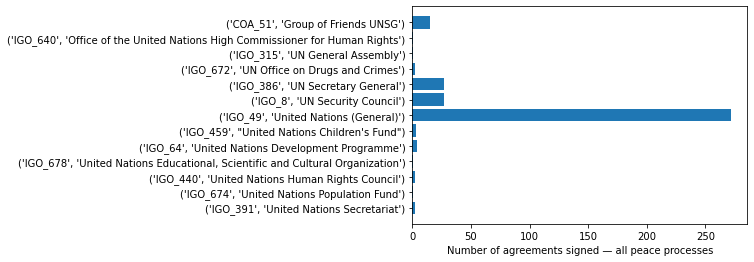

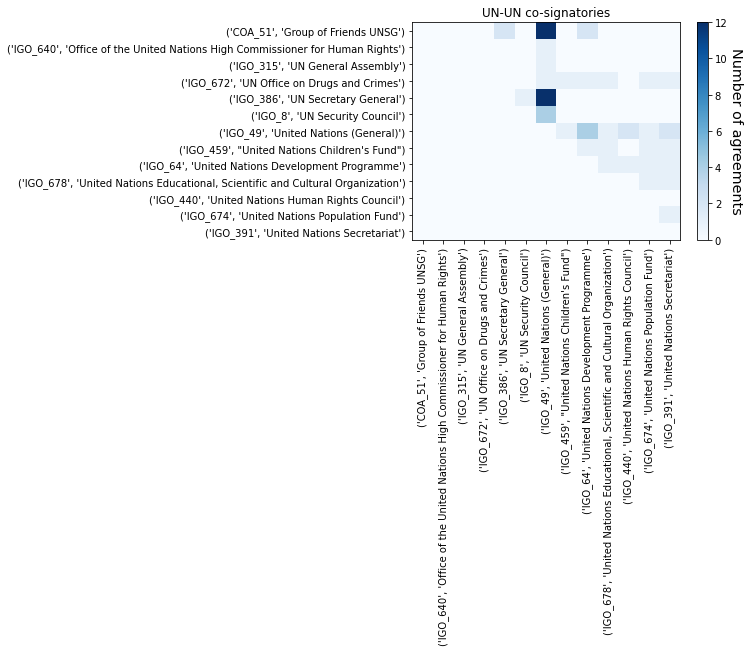

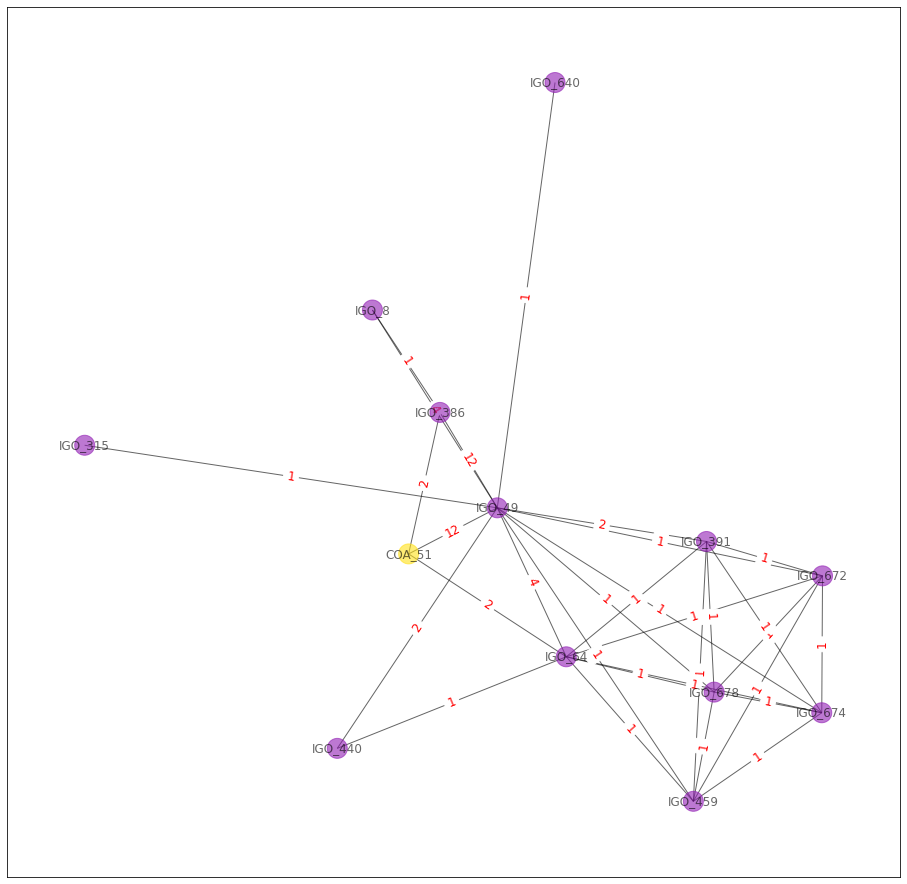

In [5]:
# Get UN actor labels

label_list = [(t[1],t[2]) for t in un_actors_list]

co_matrices = get_cooccurrence_matrices(un_matrix)


# Co-occurrence diagonal is the columns marginal of the UN-only matrix

diag = np.diag(co_matrices[0])

plt.barh(range(0,len(diag)),diag)
plt.yticks(range(0,len(label_list)),label_list)
plt.xlabel('Number of agreements signed — all peace processes')
plt.gca().invert_yaxis()
plt.show()

# Upper triangle of actor co-occurence matrix
actor_upper = np.triu(co_matrices[0],k=1)

plt.imshow(actor_upper,aspect='auto',cmap=plt.cm.Blues)
plt.xticks(range(0,len(label_list)),label_list,rotation=90)
plt.yticks(range(0,len(label_list)),label_list)
cbar = plt.colorbar()
cbar.set_label('Number of agreements',rotation=270,labelpad=15,fontsize='x-large')
plt.title('UN-UN co-signatories')
plt.show()

display_comatrix_as_networkx_graph(co_matrices[0],un_indices,data_dict['actor_vertices'],data_dict)


### Visualisation: UN and non-UN co-signatories

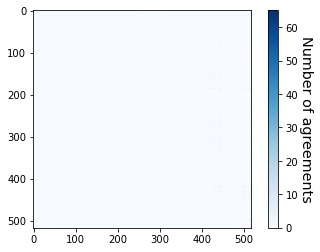

In [6]:
co_matrices = get_cooccurrence_matrices(un_cosign_matrix)
actor_upper = np.triu(co_matrices[0],k=1)

plt.imshow(actor_upper,cmap=plt.cm.Blues)
cbar = plt.colorbar()
cbar.set_label('Number of agreements',rotation=270,labelpad=15,fontsize='x-large')
plt.show()
